<a href="https://colab.research.google.com/github/rosalesberrospiu-wq/Primer_Modelo_Lineal/blob/main/PRIMERA_PARTE_VISION_ARTIFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Aca instalo las librerias que usare
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 153.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:

from roboflow import Roboflow # le estoy diciendo a python que quiero usar roboflow
rf = Roboflow(api_key="piQWeqYiUSDGVrQ0F3YN")   #debemos modificar el api_key segun tu cuenta (en cada cuenta es diferente)
#workspace es tu espacio de trabajo en roboflow y le podimos que nos pase el archivo custom_object
project = rf.workspace("rosalesspace").project("custom_object_detector_yolo11-iv80v")
version = project.version(2)   #el numero 2 es opcional,varia ya que al usar las librerias cambian las versiones o se crean nuevas
dataset = version.download("yolov11")  # aca le estoy pidiendo que descargue el dataset pero en formato yolov11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to custom_object_detector_yolo11-2 in yolov11:: 100%|██████████| 163/163 [00:00<00:00, 7752.52it/s]


In [ ]:
from ultralytics import YOLO #estas importando yolo desde la libreria ultralytics
# estas entrenando un modelo preentrenado llamado yolo11s.pt
# que significa "yolo11" version del modelo/ s tamaño small / .pt = pytorch
model = YOLO("yolo11s.pt")

In [ ]:
#aqui estamos colocando la ruta de la carpeta descargada de roboflow
data_path = "/content/custom_object_detector_yolo11-2/data.yaml"
#entrena al modelo que cargue anteriormente usando mi dataset
results = model.train(data=data_path,
                      epochs=15,
                      imgsz=640)

Ultralytics 8.4.17 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_object_detector_yolo11-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

### Apartir de aca estoy usando mi modelo de machine learning

In [ ]:
# hay dos tipos best.pt y last.pt / best.pt es el modelo que obtuvo mejor
# desempeño (mejor mAP) durante el entrenamiento y last.pt es el modelo del ultimo epoch
custom_model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
# best contiene coordenadas de bounding boxes , clases detectadas , nivel de confianza
# iformacion de cada imagen
res = custom_model("/content/custom_object_detector_yolo11-2/test/images")


image 1/8 /content/custom_object_detector_yolo11-2/test/images/11_jpeg.rf.d7868fca2fb352802ad197667db4c3c6.jpg: 640x640 1 buzz, 15.5ms
image 2/8 /content/custom_object_detector_yolo11-2/test/images/23_jpeg.rf.01d9a9c39e4c4513be6a40fde9700e99.jpg: 640x640 1 buzz, 1 pokebola, 1 reloj, 15.5ms
image 3/8 /content/custom_object_detector_yolo11-2/test/images/27_jpeg.rf.9bf23820ca0908f27f86c3d8b122b5c2.jpg: 640x640 1 pokebola, 1 reloj, 15.4ms
image 4/8 /content/custom_object_detector_yolo11-2/test/images/58_jpeg.rf.bb0682c74c206cfdc6d0bac40cd30a4f.jpg: 640x640 1 buzz, 1 reloj, 15.5ms
image 5/8 /content/custom_object_detector_yolo11-2/test/images/59_jpeg.rf.02597f1d145ffa665ee8b1c89b5fa506.jpg: 640x640 1 buzz, 1 reloj, 15.4ms
image 6/8 /content/custom_object_detector_yolo11-2/test/images/5_jpeg.rf.1e28568dea1918146afd418f25b44097.jpg: 640x640 1 buzz, 1 reloj, 15.4ms
image 7/8 /content/custom_object_detector_yolo11-2/test/images/63_jpeg.rf.78e3382e22926ec8b624fe23ca445094.jpg: 640x640 2 buzzs, 

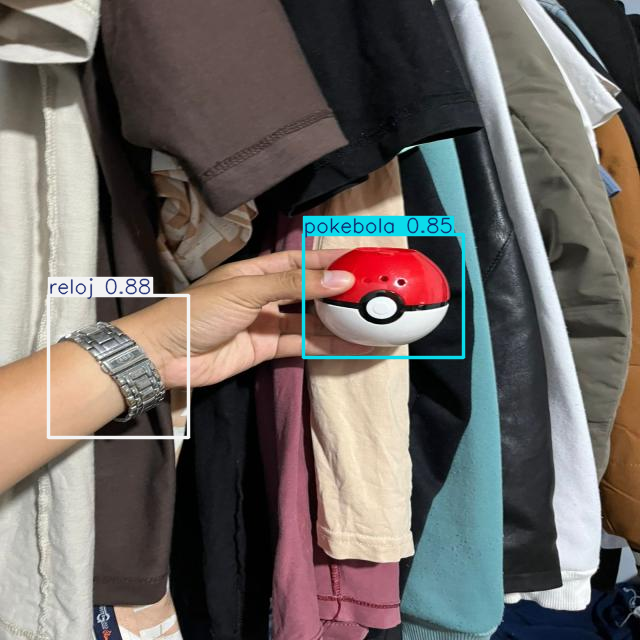

In [ ]:
# aca le digo que me muestre la figura 2
res[2].show()